# Importing Needed Libraries

Just importing the standard things we will need

In [52]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import netCDF4 as nc4
from matplotlib.ticker import MaxNLocator
import xarray as xr


### Reading in and plotting bathymetry from MITgcm

Just sanity checkign that there is still bathymetry

Total number of elements in the file: 3600
(40, 90)


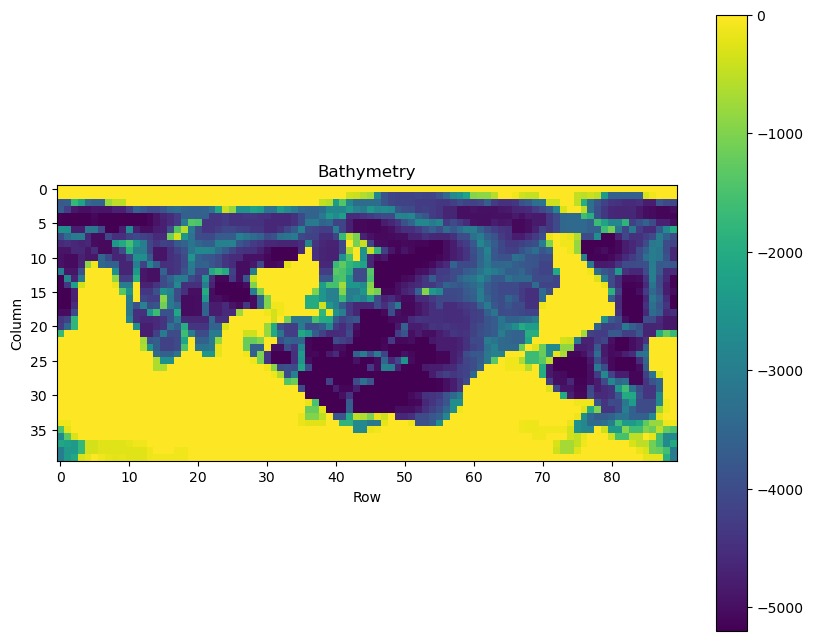

In [53]:
# read in the bathymetry grid
file_path = 'C:/Users/romed/Desktop/practicalcomputingtopics/cs185c_fall2025/MITgcm/verification/tutorial_global_oce_latlon/input/bathymetry.bin'
sNx = 45
sNy = 40
nSx =   2
nSy =   1
nPx =   1
nPy =   1
Nx  = sNx*nSx*nPx
Ny  = sNy*nSy*nPy

bathymetry = np.fromfile(file_path, '>f4').reshape((Ny, Nx))
print("Total number of elements in the file:", bathymetry.size)
print(np.shape(bathymetry))
# make a plot of the bathymetry
plt.figure(figsize=(10,8))
plt.imshow(bathymetry)
plt.colorbar() 
plt.title('Bathymetry')
plt.xlabel('Row')
plt.ylabel('Column')
plt.show()

# Rotate the bathymetry by 90°

Also store it to a file so we can use it later

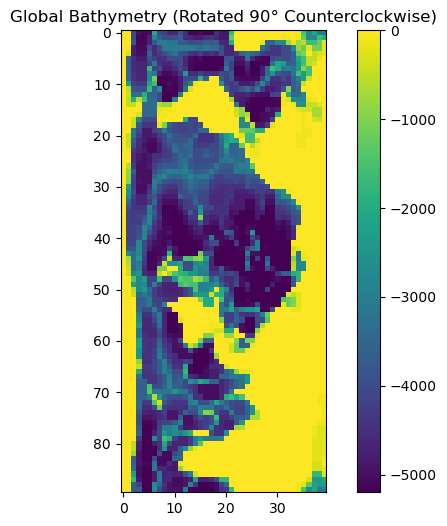

Rotated shape: (90, 40)
Min: -5200.0 Max: 0.0


In [54]:
# Rotate 90° counterclockwise
bathy_rotated = np.rot90(bathymetry)

plt.figure(figsize=(8, 6))
plt.imshow(bathy_rotated, cmap='viridis')
plt.title("Global Bathymetry (Rotated 90° Counterclockwise)")
plt.colorbar()
plt.show()

bathy_rotated.tofile("rotated_bathymetry.bin")

print("Rotated shape:", bathy_rotated.shape)
print("Min:", bathy_rotated.min(), "Max:", bathy_rotated.max())
bathy_rotated.astype(np.float32).tofile("rotated_bathymetry.bin")

# Sanity Check By Reloading the transformed file

We will load the file we saved before and ensure that the bathymetry is rotated properly

Read shape: (90, 40)
Min: -5200.0 Max: 0.0


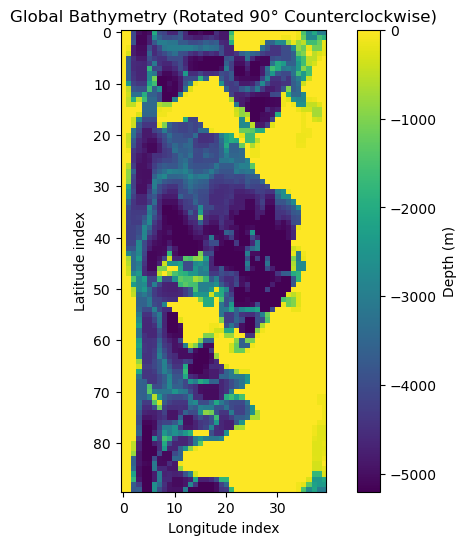

In [57]:
rotate_file_path = 'C:/Users/romed/Desktop/github fixer/cs185c_spring2025/Rotate_The_Earth/rotated_bathymetry.bin'


data = np.fromfile(rotate_file_path, dtype=np.float32)
data = data.reshape((Nx, Ny))
print("Read shape:", data.shape)
print("Min:", data.min(), "Max:", data.max())

# Plotting the data
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='viridis')  # use origin='lower' if needed to orient correctly
plt.title("Global Bathymetry (Rotated 90° Counterclockwise)")
plt.xlabel("Longitude index")
plt.ylabel("Latitude index")
plt.colorbar(label="Depth (m)")
plt.show()

# An attempt using the full gebco dataset

I used the full gebco TID Dataset Im not fully sure if this is correct but this may just be a consequence of it being extra large.

<xarray.Dataset> Size: 4GB
Dimensions:  (lon: 86400, lat: 43200)
Coordinates:
  * lon      (lon) float64 691kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat      (lat) float64 346kB -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 90.0
Data variables:
    crs      |S1 1B ...
    tid      (lat, lon) int8 4GB ...
Attributes: (12/31)
    title:                           The GEBCO_2024 Grid Type Identifier
    summary:                         The GEBCO_2024 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/1c44ce99-0a0d-5f4f-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_lon_max:              180.0
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.004166666666666667
    identifier_product_doi:          DOI: 10.5285/

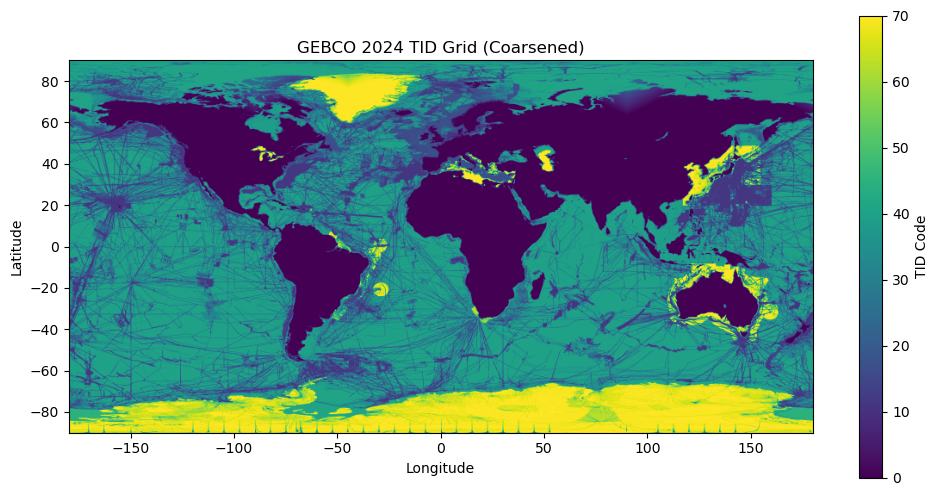

In [58]:
ds = xr.open_dataset('GEBCO_2024_TID.nc')
print(ds)


tid = ds.tid 
tid_coarse = tid.coarsen(lon=100, lat=100, boundary='trim').mean()


plt.figure(figsize=(12, 6))
plt.imshow(tid_coarse, cmap='viridis', extent=[-180, 180, -90, 90], origin='lower')
plt.title("GEBCO 2024 TID Grid (Coarsened)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="TID Code")
plt.show()


### Rotating Gebco by 90°
Finally we will attempt to rotate the gebco dataset by 90° and plot it, I am unsure if this is a properly usable bathymetry file however

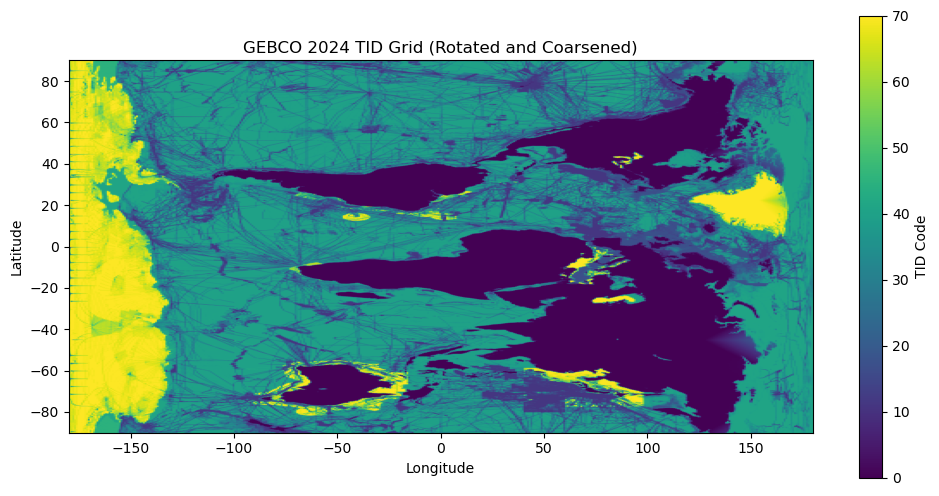

In [63]:
tid_coarse_rotated = np.rot90(tid_coarse.values, k=1)

plt.figure(figsize=(12, 6))
plt.imshow(tid_coarse_rotated, cmap='viridis', extent=[-180, 180, -90, 90], origin='lower')
plt.title("GEBCO 2024 TID Grid (Rotated and Coarsened)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label="TID Code")
plt.show()

### That seemed to have worked ok
Im still hesitant to save the file as I feel like I downloaded the wrong one, but that is definitley higher resolution than what MITgcm.
The file is also 4gb so unless im certain its the one I want I will refrain from making copies

Will Likely talk with you in class.